In [1]:
#csv 불러오기
import pandas as pd
csv_te = pd.read_csv("csv_file_change.csv")
csv_te

,Unnamed: 0,id,file,label
0,0,0,1.wav,0
1,1,1,2.wav,0
2,2,2,3.wav,0
3,3,3,4.wav,0
4,4,4,5.wav,0
...,...,...,...,...
50100,50100,50100,50101.wav,1
50101,50101,50101,50102.wav,1
50102,50102,50102,50103.wav,1
50103,50103,50103,50104.wav,1


In [2]:
#필요 열만 취함
df = csv_te.drop(csv_te.columns[[0]], axis=1)
df

,id,file,label
0,0,1.wav,0
1,1,2.wav,0
2,2,3.wav,0
3,3,4.wav,0
4,4,5.wav,0
...,...,...,...
50100,50100,50101.wav,1
50101,50101,50102.wav,1
50102,50102,50103.wav,1
50103,50103,50104.wav,1


In [3]:
#섞어서 난수 생성
df_shuffled = df.sample(frac=1).reset_index(drop=True)

In [4]:
df_shuffled

,id,file,label
0,12336,12337.wav,0
1,3338,3339.wav,0
2,36624,36625.wav,0
3,36860,36861.wav,0
4,45111,45112.wav,0
...,...,...,...
50100,49991,49992.wav,1
50101,4880,4881.wav,0
50102,47459,47460.wav,0
50103,32068,32069.wav,0


In [5]:
print(df_shuffled[df_shuffled.file == '1.wav'])

       id   file  label
49313   0  1.wav      0


In [75]:
#data 들어있는 dataset 만들기, 
import librosa
from tqdm import tqdm
import os

import tensorflow as tf

#이건 gpu 실행 코드, cpu 환경은 삭제해도 좋음
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

# 이게 train dataset 작성코드
def train_dataset(x):#나눌 크기인 x초 입력
    folder = "D:/wav_data/nomal/37/"
    dataset = []
    for file_name in tqdm(os.listdir(folder)):
        if 'wav' in file_name:
            abs_file_path = os.path.join(folder,file_name)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
            #data를 x초로 나누어서 작성해야 함
            for i in range((len(data)//(sr*x))+1):
                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
    print("Dataset 생성완료")
    return pd.DataFrame(dataset, columns=['data','label'])

def anomal_dataset(x):#나눌 크기인 x초 입력
    folder = "D:/wav_data/test/"
    dataset = []
    for file_name in tqdm(os.listdir(folder)):
        if 'wav' in file_name:
            abs_file_path = os.path.join(folder,file_name)
            data, sr = librosa.load(abs_file_path, sr = 16000)
            class_label = (df_shuffled[df_shuffled.file == file_name]['label']).values[0]
           #data를 x초로 나누어서 작성해야 함
            for i in range((len(data)//(sr*x))+1):
                dataset.append([data[int(sr*x)*i:int(sr*x)*(i+1)], class_label])
    print("Dataset 생성완료")
    return pd.DataFrame(dataset, columns=['data','label'])

#train_wav = train_dataset(5)
abnomal_wav = anomal_dataset(5)

100%|████████████████████████████████████████████████████████████████████████████████| 124/124 [00:46<00:00,  2.64it/s]

Dataset 생성완료


In [7]:
#train data 확인
print(train_wav.shape)
train_wav.head()

(19493, 2)


,data,label
0,"[-0.0016891622, -0.0025447602, -0.0028883796, ...",0
1,"[-0.0034210286, -0.0041525266, -0.0037767396, ...",0
2,"[0.0033620284, 0.004957338, 0.0071420055, 0.00...",0
3,"[0.0013939056, 0.0011225477, 0.00032915836, -0...",0
4,"[0.024867965, 0.015571709, -0.0084072575, -0.0...",0


In [32]:
abnomal_wav

,data,label
0,"[-0.00055966503, -0.0005657119, -0.0005393461,...",0
1,"[0.015930885, 0.01525387, 0.013981207, 0.01214...",0
2,"[0.00037218435, 0.00032808585, 0.0003594728, 0...",0
3,"[0.0032489628, 0.0020151078, 0.0005948128, -0....",0
4,"[0.000105859006, 0.00019747746, 0.0001368796, ...",0
...,...,...
6597,"[-0.17145781, 0.05305237, 0.21752563, 0.277462...",1
6598,"[-0.20895986, -0.066784315, 0.12537754, 0.2244...",1
6599,"[-0.025951223, -0.00966903, 0.012775022, 0.034...",1
6600,"[-0.10069308, 0.048771836, 0.051365085, -0.163...",1


In [9]:
#배열 확인
for i in range(len(train_wav)):
    print(len(train_wav['data'][i]))

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
68732
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
27234
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15134
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
52582
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
43012
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
23524
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
68482
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
22598
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
66080
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
38632
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
45100
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
76156
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
77008
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
51316
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
27100
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
804
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
74176
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000


80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
7298
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
58838
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
40036
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
46238
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
62768

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
23516
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
52720
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
27608
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
46326
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
69234
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
51474
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
20518
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
68000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
49384
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
12216
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
17976
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
64418
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
32794
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

In [7]:
#mel-spectrogram 처리
import numpy as np
mel_spec = []
for i in range(len(train_wav['data'])):
    mel_spec.append(librosa.feature.melspectrogram(y=np.array(train_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
mel_spec[0]

C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1520
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1838
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=970
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=426
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1676
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=498
  ret

array([[4.1533224e-04, 6.6422380e-04, 9.4623922e-04, ..., 4.5883078e-03,
        3.4899525e-03, 2.2323322e-03],
       [4.6761564e-04, 7.1223866e-04, 9.8896911e-04, ..., 5.9989225e-02,
        3.0197116e-02, 1.1941087e-02],
       [2.7236165e-04, 3.7900131e-04, 6.0090126e-04, ..., 7.0249110e-02,
        3.7404373e-02, 1.5803944e-02],
       ...,
       [6.5862721e-08, 5.8252521e-08, 3.9752155e-08, ..., 1.8691024e-07,
        2.7371675e-07, 3.0929567e-07],
       [6.1155212e-08, 5.4090194e-08, 3.6912667e-08, ..., 1.5255438e-07,
        2.2340555e-07, 2.5244537e-07],
       [5.8316964e-08, 5.1580528e-08, 3.5200543e-08, ..., 1.3382343e-07,
        1.9597611e-07, 2.2145124e-07]], dtype=float32)

In [8]:
print(len(mel_spec))
print(np.array(mel_spec[0]).shape)
print(np.array(mel_spec[0][0]).shape)

19176
(40, 501)
(501,)


In [9]:
# mel-spectrogram 처리한 데이터 이후 배열 맞춤
def padding(pa):
    z = np.zeros((len(pa),len(mel_spec[0][0])-(len(pa[0]))), dtype = int)
    pa = np.append(pa, z, axis = 1)
    return pa
for i in range(len(mel_spec)):
    mel_spec[i] = padding(mel_spec[i])
print(mel_spec[-1])
print(len(mel_spec))
print(np.array(mel_spec[-1]).shape)
print(np.array(mel_spec[-1][-1]).shape)

[[1.06668938e-03 1.27448945e-03 1.31202477e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.80018896e-03 3.66605446e-03 4.14981553e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.38739231e-02 3.31638008e-02 2.76701432e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.24346750e-05 8.17833206e-05 5.58323227e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.75915503e-05 7.74982473e-05 5.29069221e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.45700051e-05 7.48247840e-05 5.10817881e-05 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
19176
(40, 501)
(501,)


In [10]:
#Train, Validation 나눔 배열 확인
train_X, vali_X = np.split(mel_spec, [int(len(mel_spec)*0.8)])
train_y, vali_y = np.split(train_wav.label, [int(len(mel_spec)*0.8)])
print(train_X.shape)
print(vali_X.shape)

(15340, 40, 501)
(3836, 40, 501)


In [14]:
# 모델 작성 가중치 추가로 올릴 때는 실행 필요 없음
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Embedding, Dense
model = Sequential()
model.add(keras.Input(shape=(len(train_X[0]),len(train_X[0][0]))))
model.add(LSTM(501, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(Dense(5))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(100, return_sequences=True))
#model.add(LSTM(200, return_sequences=True))
model.add(LSTM(501, return_sequences=True))
#model.add(TimeDistributed(Dense(1,activation='sigmoid')))
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 501)           2010012   
                                                                 
 lstm_1 (LSTM)               (None, 40, 100)           240800    
                                                                 
 lstm_2 (LSTM)               (None, 40, 50)            30200     
                                                                 
 dense (Dense)               (None, 40, 5)             255       
                                                                 
 lstm_3 (LSTM)               (None, 40, 50)            11200     
                                                                 
 lstm_4 (LSTM)               (None, 40, 100)           60400     
                                                                 
 lstm_5 (LSTM)               (None, 40, 501)           1

In [11]:
# 모델 불러오기, 가중치 추가로 올릴 때 반드시 필요
model = tf.keras.models.load_model('model36-2.h5')

In [77]:
# 모델 학습
import tensorflow as tf
from keras.callbacks import EarlyStopping

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
        
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
#early_stopping = EarlyStopping()
history = model.fit(train_X, train_X, epochs=500, batch_size = 40, validation_data=(vali_X, vali_X)
                    #,callbacks = [early_stopping]
                   )

Epoch 1/500
390/390 [==============================] - 25s 39ms/step - loss: 0.2124 - accuracy: 0.0304 - val_loss: 0.1909 - val_accuracy: 0.0316
Epoch 2/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2121 - accuracy: 0.0307 - val_loss: 0.1907 - val_accuracy: 0.0318
Epoch 3/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2119 - accuracy: 0.0311 - val_loss: 0.1908 - val_accuracy: 0.0314
Epoch 4/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2119 - accuracy: 0.0306 - val_loss: 0.1908 - val_accuracy: 0.0319
Epoch 5/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2118 - accuracy: 0.0310 - val_loss: 0.1909 - val_accuracy: 0.0313
Epoch 6/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2118 - accuracy: 0.0311 - val_loss: 0.1908 - val_accuracy: 0.0317
Epoch 7/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2117 - accuracy: 0.0313 - val_loss: 0.1908 - val_ac

390/390 [==============================] - 11s 28ms/step - loss: 0.2108 - accuracy: 0.0315 - val_loss: 0.1908 - val_accuracy: 0.0312
Epoch 114/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2108 - accuracy: 0.0316 - val_loss: 0.1909 - val_accuracy: 0.0314
Epoch 115/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2109 - accuracy: 0.0314 - val_loss: 0.1909 - val_accuracy: 0.0315
Epoch 116/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2109 - accuracy: 0.0314 - val_loss: 0.1908 - val_accuracy: 0.0314
Epoch 117/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2109 - accuracy: 0.0315 - val_loss: 0.1909 - val_accuracy: 0.0311
Epoch 118/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2109 - accuracy: 0.0314 - val_loss: 0.1909 - val_accuracy: 0.0314
Epoch 119/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2108 - accuracy: 0.0315 - val_loss: 0.1908 - val_ac

Epoch 169/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0319 - val_loss: 0.1907 - val_accuracy: 0.0316
Epoch 170/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0318 - val_loss: 0.1907 - val_accuracy: 0.0321
Epoch 171/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0316 - val_loss: 0.1907 - val_accuracy: 0.0318
Epoch 172/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2105 - accuracy: 0.0315 - val_loss: 0.1908 - val_accuracy: 0.0321
Epoch 173/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0318 - val_loss: 0.1907 - val_accuracy: 0.0323
Epoch 174/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0319 - val_loss: 0.1908 - val_accuracy: 0.0318
Epoch 175/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0318 - val_loss: 0

Epoch 225/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0320 - val_loss: 0.1908 - val_accuracy: 0.0319
Epoch 226/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0320 - val_loss: 0.1908 - val_accuracy: 0.0314
Epoch 227/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0320 - val_loss: 0.1909 - val_accuracy: 0.0315
Epoch 228/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0319 - val_loss: 0.1910 - val_accuracy: 0.0320
Epoch 229/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2106 - accuracy: 0.0321 - val_loss: 0.1909 - val_accuracy: 0.0313
Epoch 230/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0320 - val_loss: 0.1909 - val_accuracy: 0.0315
Epoch 231/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0319 - val_loss: 0

Epoch 281/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0320 - val_loss: 0.1910 - val_accuracy: 0.0317
Epoch 282/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0319 - val_loss: 0.1909 - val_accuracy: 0.0320
Epoch 283/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2106 - accuracy: 0.0321 - val_loss: 0.1910 - val_accuracy: 0.0320
Epoch 284/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0320 - val_loss: 0.1909 - val_accuracy: 0.0317
Epoch 285/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0318 - val_loss: 0.1910 - val_accuracy: 0.0315
Epoch 286/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0316 - val_loss: 0.1909 - val_accuracy: 0.0313
Epoch 287/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0319 - val_loss: 0

Epoch 337/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0320 - val_loss: 0.1910 - val_accuracy: 0.0315
Epoch 338/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0319 - val_loss: 0.1910 - val_accuracy: 0.0318
Epoch 339/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0319 - val_loss: 0.1911 - val_accuracy: 0.0313
Epoch 340/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0318 - val_loss: 0.1911 - val_accuracy: 0.0313
Epoch 341/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0320 - val_loss: 0.1911 - val_accuracy: 0.0315
Epoch 342/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2106 - accuracy: 0.0321 - val_loss: 0.1911 - val_accuracy: 0.0312
Epoch 343/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2106 - accuracy: 0.0318 - val_loss: 0

Epoch 393/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2104 - accuracy: 0.0326 - val_loss: 0.1910 - val_accuracy: 0.0324
Epoch 394/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0326 - val_loss: 0.1909 - val_accuracy: 0.0322
Epoch 395/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0328 - val_loss: 0.1910 - val_accuracy: 0.0320
Epoch 396/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0326 - val_loss: 0.1910 - val_accuracy: 0.0318
Epoch 397/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0326 - val_loss: 0.1909 - val_accuracy: 0.0323
Epoch 398/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0326 - val_loss: 0.1910 - val_accuracy: 0.0322
Epoch 399/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0326 - val_loss: 0

Epoch 449/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0327 - val_loss: 0.1910 - val_accuracy: 0.0329
Epoch 450/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0328 - val_loss: 0.1910 - val_accuracy: 0.0325
Epoch 451/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2105 - accuracy: 0.0327 - val_loss: 0.1910 - val_accuracy: 0.0329
Epoch 452/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2105 - accuracy: 0.0330 - val_loss: 0.1909 - val_accuracy: 0.0325
Epoch 453/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2104 - accuracy: 0.0329 - val_loss: 0.1909 - val_accuracy: 0.0325
Epoch 454/500
390/390 [==============================] - 11s 28ms/step - loss: 0.2104 - accuracy: 0.0330 - val_loss: 0.1909 - val_accuracy: 0.0320
Epoch 455/500
390/390 [==============================] - 11s 27ms/step - loss: 0.2104 - accuracy: 0.0325 - val_loss: 0

In [78]:
#모델 저장하기
model.save('model37.h5')

In [76]:
# Test data mel-spectrogram 처리
import numpy as np
ab_mel_spec = []
for i in range(len(abnomal_wav['data'])):
    ab_mel_spec.append(librosa.feature.melspectrogram(y=np.array(abnomal_wav['data'][i]), sr=16000, hop_length=160, n_mels=40))
ab_mel_spec[0]

C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=916
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=222
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=236
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=340
  return f(*args, **kwargs)
C:\Users\evali\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=326
  return f(*args, **kwargs)


array([[2.2533047e-04, 3.1591507e-04, 3.9538791e-04, ..., 6.8724260e-04,
        7.4697146e-04, 6.9704198e-04],
       [5.4579286e-04, 8.9103181e-04, 1.2853360e-03, ..., 6.8522111e-02,
        4.6230152e-02, 2.7615499e-02],
       [1.5659622e-03, 3.2439211e-03, 5.5009653e-03, ..., 5.5434387e-02,
        3.5252340e-02, 1.9956779e-02],
       ...,
       [9.8975343e-09, 8.7548244e-09, 5.9750911e-09, ..., 5.6070626e-06,
        8.1994122e-06, 9.2535392e-06],
       [9.1326164e-09, 8.0783220e-09, 5.5134644e-09, ..., 5.3078111e-06,
        7.7618060e-06, 8.7596736e-06],
       [8.6768503e-09, 7.6752347e-09, 5.2384008e-09, ..., 5.1205780e-06,
        7.4880104e-06, 8.4506801e-06]], dtype=float32)

In [77]:
# test data 배열 맞추기
for i in range(len(ab_mel_spec)):
    ab_mel_spec[i] = padding(ab_mel_spec[i])

In [78]:
# 배열 test X, test y
ab_X = np.array(ab_mel_spec)
ab_y = np.array(abnomal_wav.label)
print(ab_X.shape)
print(ab_y.shape)

(6449, 40, 501)
(6449,)


In [79]:
# test data evaluate
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
model.evaluate(ab_X, ab_X)

202/202 [==============================] - 2s 11ms/step - loss: 0.6132 - accuracy: 0.0292


[0.6132187843322754, 0.029233215376734734]

In [80]:
# predict
ab_y_pred = model.predict(ab_X)

202/202 [==============================] - 2s 8ms/step


In [81]:
print(ab_X.shape)
print(ab_y_pred.shape)
ab_X = ab_X.reshape(-1,20040)
ab_y_pred = ab_y_pred.reshape(-1,20040)
print(ab_X.shape)
print(ab_y_pred.shape)

(6449, 40, 501)
(6449, 40, 501)
(6449, 20040)
(6449, 20040)


In [61]:
reduction = tf.keras.losses.Reduction.SUM
mse_1 = tf.keras.losses.MeanSquaredError(reduction=reduction)
print((mse_1(ab_X, ab_y_pred))*0.0000001)

tf.Tensor(4.827757, shape=(), dtype=float32)


In [69]:
reduction = tf.keras.losses.Reduction.SUM
mse_1 = tf.keras.losses.MeanSquaredError(reduction=reduction)
print((mse_1(ab_X[255], ab_y_pred[255]))*0.00000001)

tf.Tensor(0.00030401172, shape=(), dtype=float32)


In [47]:
def MSE_1(y_true, y_pred):
    x = (tf.reduce_sum(tf.square(tf.subtract(y_true, y_pred)))*0.00000001)
    y = (tf.cast(tf.shape(y_true)[1], tf.float64)*0.00000001) # divide by the shape of the tensor
    return tf.divide(x, y)

print(MSE_1(ab_X, ab_y_pred))

tf.Tensor(604648140.824598, shape=(), dtype=float64)


In [82]:
from tensorflow.python.framework.ops import EagerTensor
MSE_custom = tf.reduce_mean((ab_X - ab_y_pred)**2)
result1 = MSE_custom(ab_X, ab_y_pred)  # 0.355 

mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.AUTO)
result2 = mse(ab_X, ab_y_pred)
print(result1)
print(result2)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

In [52]:
# predict 확인
ab_y_pred
#= ab_y_pred.reshape((len(ab_X),))

array([[[ 1.55407415e-05,  6.54288351e-06,  1.14345949e-05, ...,
          4.56235185e-03,  4.21161624e-03,  9.09720082e-03],
        [ 2.32378035e-04,  1.11342204e-04,  1.97758331e-04, ...,
          2.79678609e-02,  2.47493479e-02,  5.55946045e-02],
        [ 2.74506019e-04,  2.32813210e-04,  4.68982500e-04, ...,
          4.12933305e-02,  3.46165784e-02,  3.48374993e-02],
        ...,
        [ 2.05183960e-12,  1.18703105e-12,  3.01026586e-12, ...,
          1.06410646e-07,  2.43327740e-08,  2.13600458e-07],
        [ 1.86344755e-12,  8.88585754e-13,  2.02819966e-12, ...,
          1.49799035e-07,  2.97741263e-08,  2.75756577e-07],
        [ 1.94032681e-12,  8.84974928e-13,  2.01933847e-12, ...,
          1.23060389e-07,  1.96069525e-08,  2.08601620e-07]],

       [[ 1.54693131e-04,  1.81124138e-04,  3.29045579e-04, ...,
         -4.19289368e-04,  7.72198400e-05,  4.38190000e-05],
        [ 2.10278644e-03,  1.72352754e-02,  2.76464950e-02, ...,
          4.17584414e-03,  1.29404862e

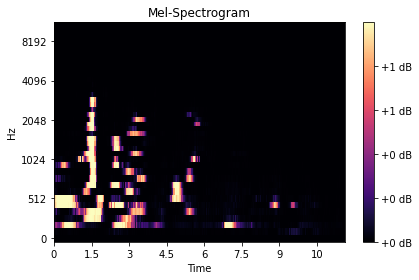

In [57]:
# 복원한 값 시각화
import librosa.display
import matplotlib.pyplot as plt

librosa.display.specshow(ab_y_pred[35], y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel_Spectrogram_pred.png')
plt.show()

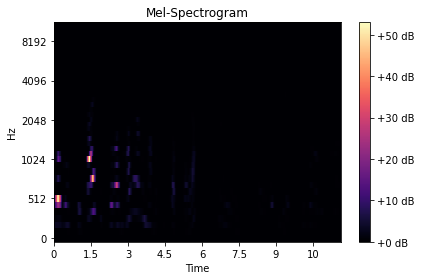

In [58]:
# 원본 값 시각화
librosa.display.specshow(ab_X[35], y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel_Spectrogram_origin.png')
plt.show()

In [29]:
# test 원본 확인
ab_X

array([[[1.09116063e-10, 1.44777620e-10, 1.63098035e-10, ...,
         4.30100877e-03, 3.79242538e-03, 3.26961395e-03],
        [7.08869977e-11, 1.24300792e-10, 1.84048859e-10, ...,
         7.90557787e-02, 6.35935366e-02, 4.44505364e-02],
        [5.38954437e-11, 8.66495625e-11, 1.25204069e-10, ...,
         2.21454073e-02, 2.44977996e-02, 2.33735181e-02],
        ...,
        [1.14067467e-09, 1.65341718e-09, 2.08804352e-09, ...,
         3.11687950e-06, 4.55425470e-06, 5.13693385e-06],
        [1.30520006e-09, 1.88717619e-09, 2.40014009e-09, ...,
         2.78126436e-06, 4.06121217e-06, 4.57995930e-06],
        [6.90048074e-10, 9.87855464e-10, 1.21677557e-09, ...,
         2.58269415e-06, 3.77315905e-06, 4.25581175e-06]],

       [[2.78191897e-03, 2.57373066e-03, 1.89965509e-03, ...,
         3.26105583e-05, 3.86636675e-05, 3.78039367e-05],
        [3.85882780e-02, 5.99721000e-02, 7.95703754e-02, ...,
         1.17376287e-04, 1.05219107e-04, 8.20943242e-05],
        [2.15212107e-02, 

In [95]:
#test X, y_pted 배열 확인
print(ab_X.shape)
print(ab_y_pred.shape)

(6449, 20040)
(6449, 20040)


In [75]:
#mse 하기 위해 배열 2차원으로 변환
ab_X1 = ab_X.flatten()
ab_y_pred1 = ab_y_pred.flatten()
ab_y = ab_y.flatten()

In [82]:
#mean squared error
mse = np.mean(np.power(ab_X - ab_y_pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': ab_y})

In [83]:
mse.shape

(6449,)

In [84]:
error_df

,Reconstruction_error,True_class
0,3.913936e-01,0
1,2.280128e-01,0
2,4.120405e-01,0
3,3.642466e-01,0
4,1.253013e-01,0
...,...,...
6444,1.123389e+04,1
6445,1.099168e+04,1
6446,1.115486e+04,1
6447,3.601688e+03,1


In [85]:
error_shuffled = error_df.sample(frac=1).reset_index(drop=True)

In [86]:
error_shuffled

,Reconstruction_error,True_class
0,0.025482,0
1,2.342568,0
2,1.437970,0
3,22.537257,0
4,0.510312,0
...,...,...
6444,0.004260,0
6445,3.303884,0
6446,1.427686,0
6447,0.287351,0


In [96]:
# metrics 에서 막힘
from sklearn import metrics
precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_shuffled['True_class'], error_shuffled['Reconstruction_error'])
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
threshold_fixed = threshold_rt[index_cnt]
print(precision_rt)
print(recall_rt)
print(threshold_rt)
print(index_cnt)
print(threshold_fixed)

[0.0241898  0.02403846 0.02404219 ... 1.         1.         1.        ]
[1.         0.99358974 0.99358974 ... 0.01282051 0.00641026 0.        ]
[3.11669325e-07 3.12045211e-07 3.13399836e-07 ... 1.89932631e+04
 1.97929379e+04 2.85938994e+04]
6293
223.6729400004114


anomaly detection predicted plot :


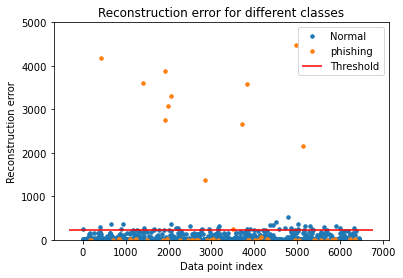

In [92]:
#그래프 그리기
import matplotlib.pyplot as plt
groups = error_shuffled.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "phishing" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.ylim([0, 5000])
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
print("anomaly detection predicted plot :")
plt.savefig('reconstruction_error.png')
plt.show()

In [93]:
# ???? 이건 뭐죠?
y_pred = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

cf_matrix = metrics.confusion_matrix(error_df['True_class'], y_pred)

In [94]:

# 그래프 그리기
plt.figure(figsize=(7, 7))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

NameError: name 'sns' is not defined

<Figure size 504x504 with 0 Axes>

In [ ]:
# reshape 실험용 안 쓰일 수 있음
#ab_X = ab_X.reshape(ab_X.shape[0]*ab_X.shape[1],ab_X.shape[2])
#ab_y_pred = ab_y_pred.reshape(ab_y_pred.shape[0]*ab_y_pred.shape[1],ab_y_pred.shape[2])

In [ ]:
#print(ab_X.shape)
#print(ab_y_pred.shape)

In [32]:
# flatten 및 0,1 바이너리로 나누기 이게 맞나 확인용
ab_X = np.array(ab_X).flatten()
ab_X = np.where(ab_X > 0.5, 1,0)
ab_y_pred = np.array(ab_y_pred).flatten()
ab_y_pred = np.where(ab_y_pred > 0.5, 1,0)

In [33]:
# 0,1 바이너리 나눈 것 확인 원본
ab_X

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
np.unique(ab_X)

array([0, 1])

In [35]:
# 0,1 바이너리 나눈 것 확인 pred
ab_y_pred

array([0, 0, 0, ..., 0, 0, 0])

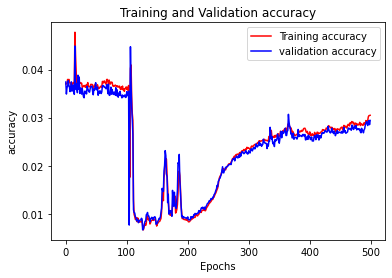

In [36]:
#train & validation accuracy 확인
import matplotlib.pyplot as plt

n_epochs = len(history.history['loss'])
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(0,n_epochs)
plt.plot(epochs, loss_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy') ## <=loss아니고, accuracy임^^
plt.legend()
plt.show()

In [37]:
#배열 확인
for i in range(len(train_wav)):
    print(len(train_wav['data'][i]))

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
51534
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
61864
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
58554
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
54012
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
30688
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
73640
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
14108
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
75812
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
18056
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
10742
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
6564
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
78988
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8232
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000


80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
46378
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
42676
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
20220
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
15812
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
26246
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
60844
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
77068
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

77462
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
29752
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
70410
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
63000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
72846
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
50360
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
36674
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
80000
8000

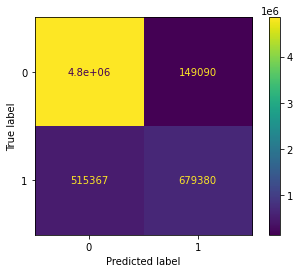

In [38]:
# confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(ab_X, ab_y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1'])
cm_display.plot()
plt.show()

In [39]:
#각 스코어 확인
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
print('Acc Score: ',accuracy_score(ab_X,ab_y_pred))
print('Recall Score: ',recall_score(ab_X,ab_y_pred))
print('Pre Score: ',precision_score(ab_X,ab_y_pred))
print('F1 Score: ',f1_score(ab_X,ab_y_pred))

Acc Score:  0.8926972915011401
Recall Score:  0.5686392181775723
Pre Score:  0.8200417637331466
F1 Score:  0.6715839180868884


In [40]:
# ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ab_X, ab_y_pred)
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPRate(Recall)': tpr,
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,2
1,0.029832,0.568639,1
2,1.000000,1.000000,0


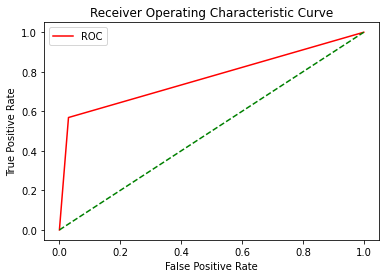

In [41]:
# ROC 커브 확인 커브 된 것 맞음
import matplotlib.pyplot as plt
import seaborn as sns
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [42]:
# flatten 된 배열 다시 -1,1로 바꾸기
ab_X = ab_X.reshape(-1,1)
ab_y_pred = ab_y_pred.reshape(-1,1)

In [43]:
#아 randomforest 해야했나
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(ab_X, ab_y_pred)
rf.score(ab_X,ab_y_pred)

C:\Users\evali\AppData\Local\Temp\ipykernel_13664\817173717.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(ab_X, ab_y_pred)


0.8926972915011401

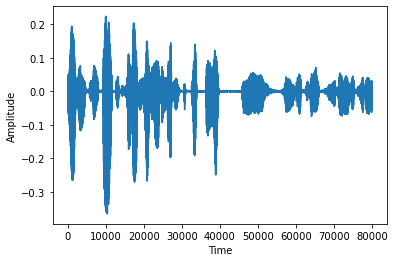

In [69]:
import matplotlib.pyplot as plt
audio = abnomal_wav['data'][35]
plt.plot(audio)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.savefig('wav_origin2.png')
plt.show()

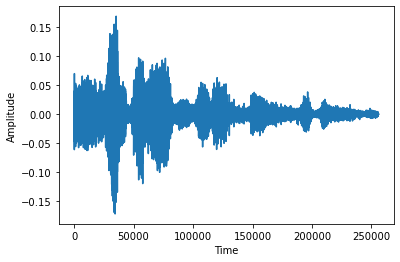

In [70]:
D = librosa.feature.inverse.mel_to_audio(ab_y_pred[35])
plt.plot(D)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.savefig('wav_pred2.png')
plt.show()

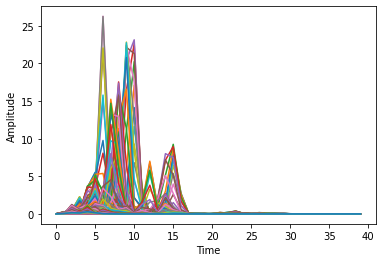

In [59]:
audioa = ab_X[4]
plt.plot(audioa)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()

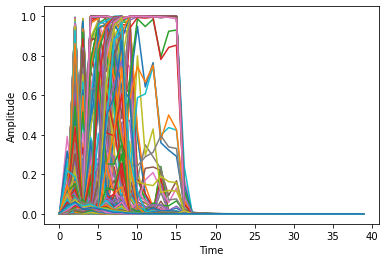

In [60]:
audioa = ab_y_pred[4]
plt.plot(audioa)
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.show()